In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# dataset real: churches:
# Link: hugging face: https://huggingface.co/datasets/tglcourse/lsun_church_train


# fake dataset: dalle3
# size: 512x512
# Link: hugging face: https://huggingface.co/datasets/laion/dalle-3-dataset


In [26]:
# The results for the datasets above, using code : https://github.com/rezashkv/gen-image-detector/blob/main/gradient/grad_metric.py
# results in file: https://drive.google.com/drive/folders/15PA34Wu727tk1wQXyeEd0ZnX98ET4yxe?usp=share_link
path_1 = '/content/drive/MyDrive/CMSC673/Final_presentation/Data/result_data_512_dalle3_churches'

results_dataset = []
for name in os.listdir(path_1):
  results_dataset.append(name)

In [5]:
i = 0
for i, file_csv in enumerate(results_dataset):
  df1 = pd.read_csv(path_1 + '/' + file_csv)
  if file_csv[0:6] == 'church':
    new_col_name = 'real_' + file_csv[7:-4]
  else:
    new_col_name = 'fake_' + file_csv[7:-4]
  df1 = df1.rename(columns={"errors": new_col_name})
  if i == 0:
    df = df1
  else:
    df = df1.join(df)

In [6]:
df

,fake_200,fake_20,real_75,fake_25,fake_5,fake_75,real_200,real_50,real_20,real_5,real_100,real_25,fake_50,fake_100
0,39212.898438,15552.643555,7504.284668,16033.271484,12588.491211,24160.976562,13528.567383,6369.255859,4756.463867,3850.294189,8569.671875,5138.264648,19910.097656,27581.003906
1,39556.484375,15074.408203,2178.882324,16418.126953,14269.876953,23722.582031,4013.690674,1807.216553,1264.928223,2648.861328,2490.212158,1356.817139,19493.167969,26072.675781
2,39806.828125,15627.408203,6374.665039,16342.680664,14703.779297,23796.980469,11980.038086,5219.756836,3714.624512,4419.527344,7370.782715,3907.380859,20013.929688,26449.128906
3,46321.445312,18592.171875,4472.095703,19444.091797,17219.410156,28068.187500,8923.271484,3675.864990,2469.458008,2379.527588,5263.586426,2722.096436,23653.089844,32904.265625
4,77890.734375,29332.292969,5391.625977,31460.542969,26084.958984,44641.503906,9137.848633,4373.963379,3473.651367,3941.999023,6073.195312,3669.666260,39274.531250,50262.984375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,14870.826172,4467.230469,7574.762695,4832.156250,4435.354980,7704.821289,14482.282227,6494.881348,4952.469727,5498.985352,9144.202148,5094.175781,6316.113281,8916.414062
396,12212.017578,3997.487793,5852.751953,4122.687500,3839.788818,6906.802734,9656.108398,5122.875000,3898.619141,4060.973877,6759.506836,4097.001953,5470.409668,7875.712402
397,12570.828125,3420.726562,4569.930176,3642.701416,3432.725342,5542.510742,9142.478516,3749.711670,2601.552246,2952.436035,5353.971680,2853.123535,4711.504883,6857.205566
398,20153.041016,5900.806152,7827.535156,6208.149414,5175.399414,10667.750000,12652.164062,7058.966309,5592.978516,6223.515625,9166.275391,5949.887695,8216.551758,12869.189453


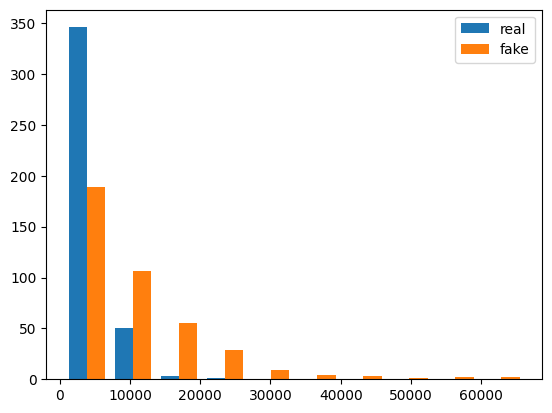

In [7]:
plt.hist([df['real_5'], df['fake_5']])

plt.legend(['real', 'fake'])
plt.show()

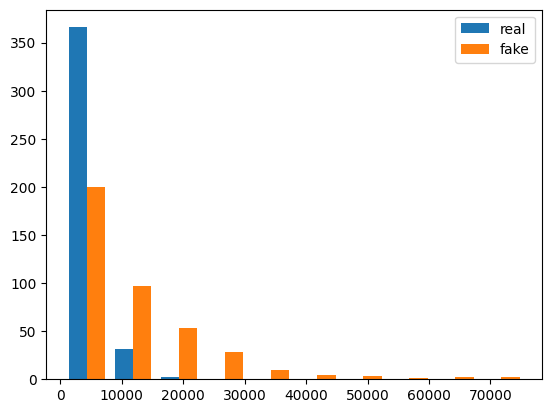

In [8]:
plt.hist([df['real_25'], df['fake_25']])

plt.legend(['real', 'fake'])
plt.show()

In [9]:
bins1 = [*range(0, 90000, 5000)]

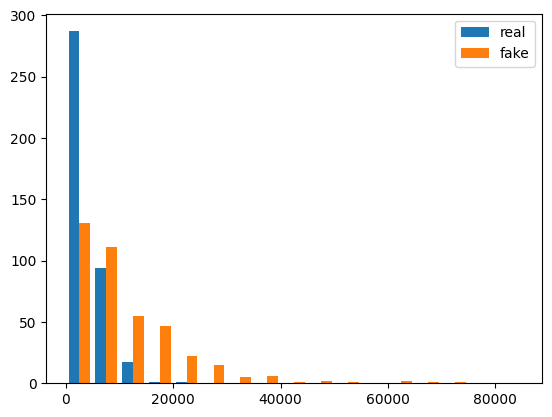

In [10]:
plt.hist([df['real_20'], df['fake_20']], bins=bins1)

plt.legend(['real', 'fake'])
plt.show()

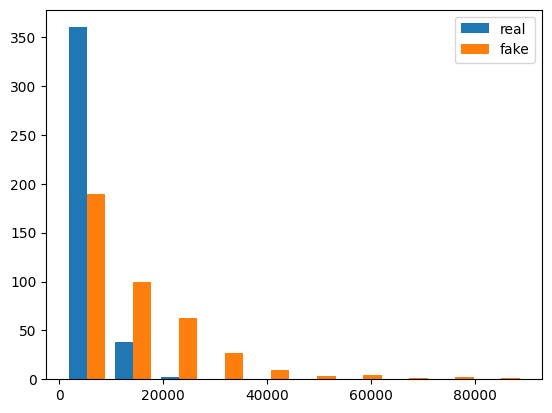

In [11]:
plt.hist([df['real_50'], df['fake_50']])

plt.legend(['real', 'fake'])
plt.show()

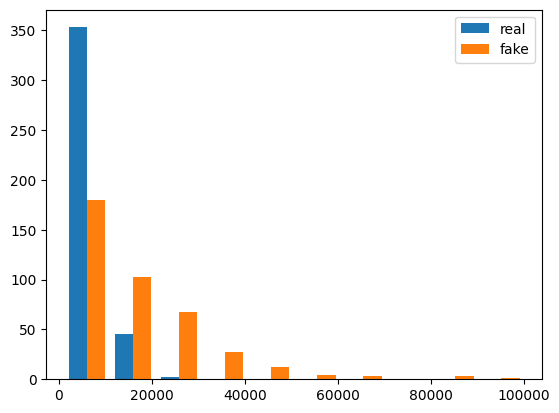

In [12]:
plt.hist([df['real_75'], df['fake_75']])

plt.legend(['real', 'fake'])
plt.show()

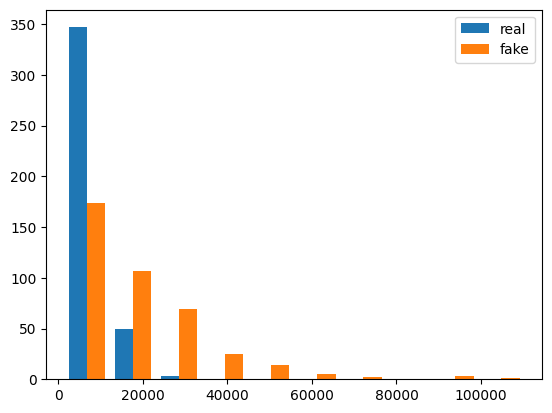

In [13]:
plt.hist([df['real_100'], df['fake_100']])

plt.legend(['real', 'fake'])
plt.show()

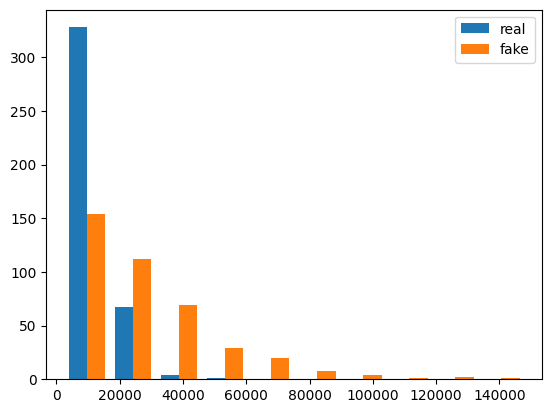

In [14]:
plt.hist([df['real_200'], df['fake_200']])

plt.legend(['real', 'fake'])
plt.show()

In [15]:
## Hard to see anything on the graphs. Next we compare the ratio of L2_error_step_1 / L2_error_step_2

In [16]:
def hypothesis_df (number_1, number_2, df, hypothesis_number):
  df_f = df[[f'fake_{number_1}', f'fake_{number_2}']].copy()
  df_r = df[[f'real_{number_1}', f'real_{number_2}']].copy()
  df_f['actual'] = 1
  df_r['actual'] = 0
  df_f['prediction'] = 0
  df_r['prediction'] = 0
  df_f.loc[df_f[f'fake_{number_1}'] / df_f[f'fake_{number_2}']  <= hypothesis_number, 'prediction'] = 1
  df_r.loc[df_r[f'real_{number_1}'] / df_r[f'real_{number_2}']  <= hypothesis_number, 'prediction'] = 1
  df_hypothesis = pd.concat([df_f, df_r])
  return df_hypothesis

In [17]:
def cf_matrix(number_1, number_2, rate, df):
  df_hypothesis = hypothesis_df (number_1, number_2, df, rate)
  y_test = df_hypothesis['actual']
  y_pred = df_hypothesis['prediction']

  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.title(f'Confusion Matrix for threshold {rate}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

In [18]:
def roc_graph(number_1, number_2, df):
  #roc
  errors_fake = list((df[f'fake_{number_1}'] / df[f'fake_{number_2}']))
  errors_real =  list(df[f'real_{number_1}'] / df[f'real_{number_2}'])
  preds =  errors_fake + errors_real
  max_pred = max(preds)
  preds = [pred / max_pred for pred in preds]
  preds = [1 - pred for pred in preds]

  t_labels = [1] * len(errors_fake) + [0] * len(errors_real)

  fpr, tpr, thresholds = metrics.roc_curve(t_labels, preds)
  auc = metrics.auc(fpr, tpr)
  acc = np.max(1 - (fpr + (1 - tpr))/2)
  roc_auc = metrics.auc(fpr, tpr)

  err = .01
  low = tpr[np.where(fpr<.01)[0][-1]]

  print(low)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
  plt.plot(low, err, 'b', label = 'FPR@TPR < 0.01 = %0.02f' % low)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

5 20
0.1025


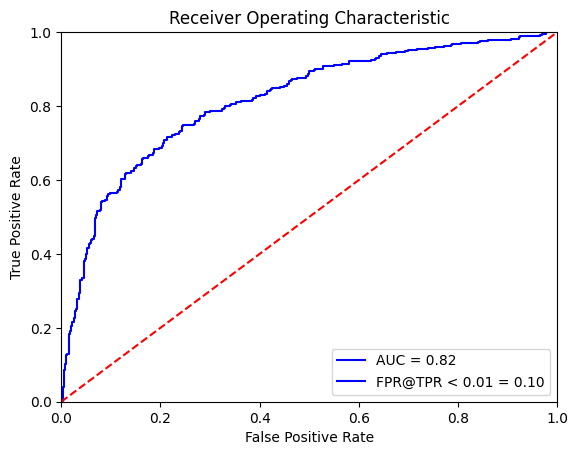

5 25
0.0475


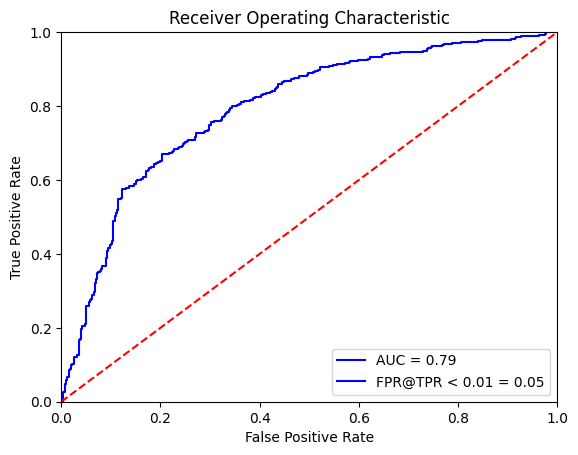

5 50
0.025


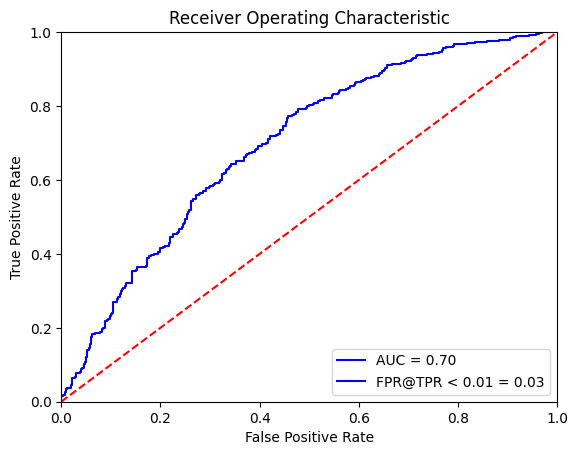

5 75
0.01


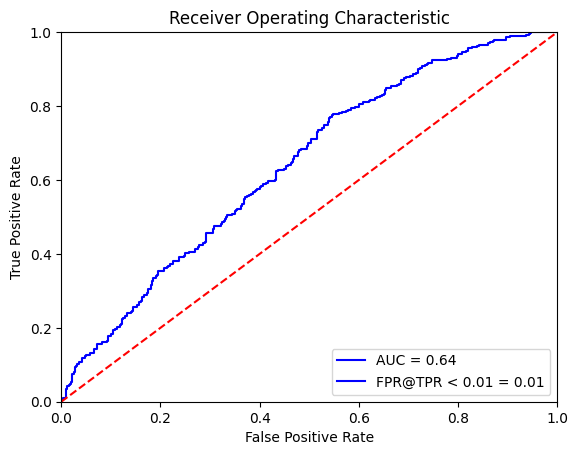

5 100
0.01


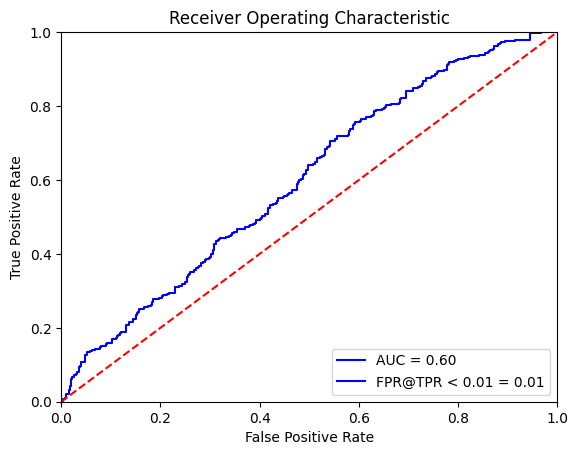

20 25
0.005


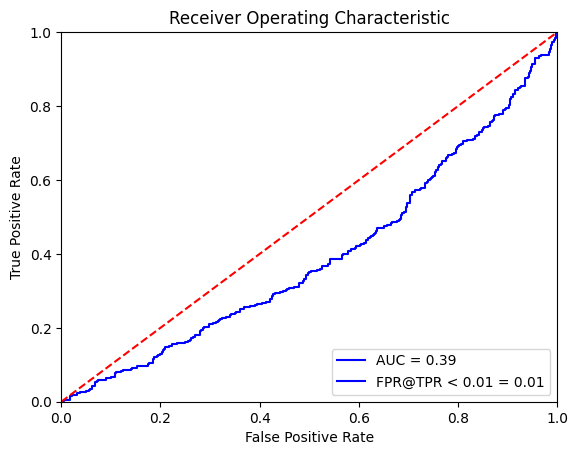

20 50
0.015


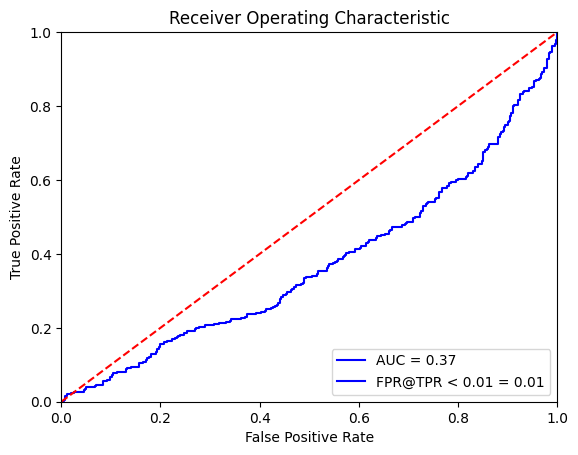

20 75
0.0125


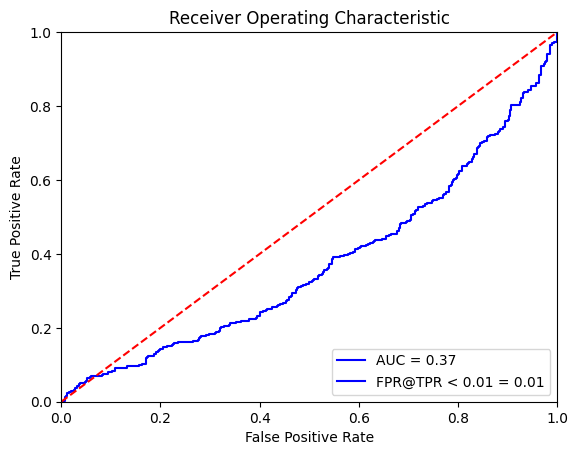

20 100
0.0


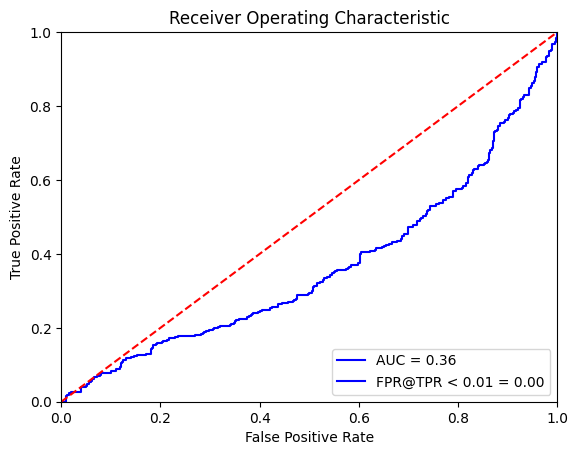

25 50
0.02


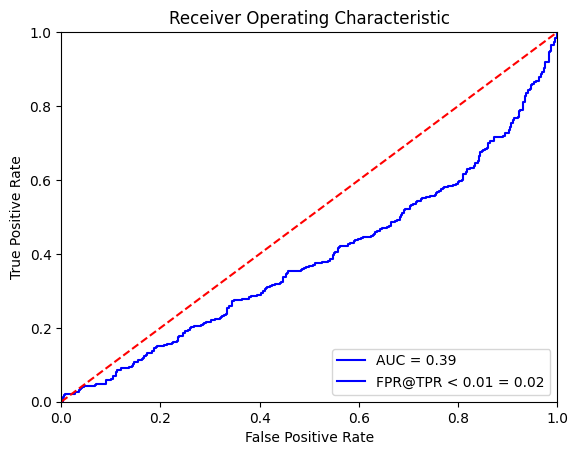

25 75
0.02


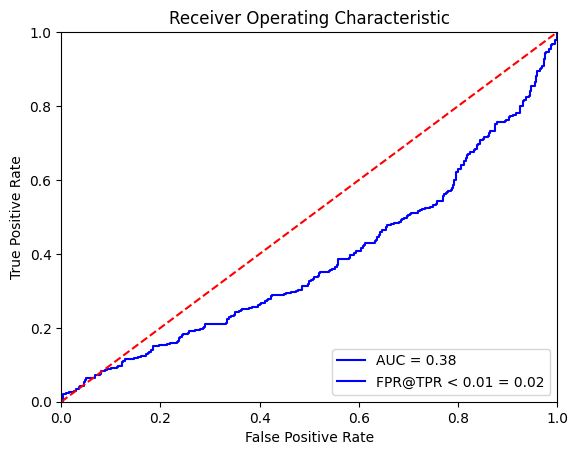

25 100
0.0175


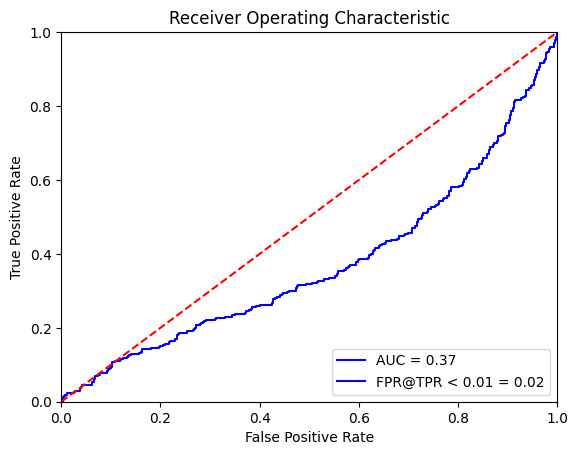

50 75
0.0225


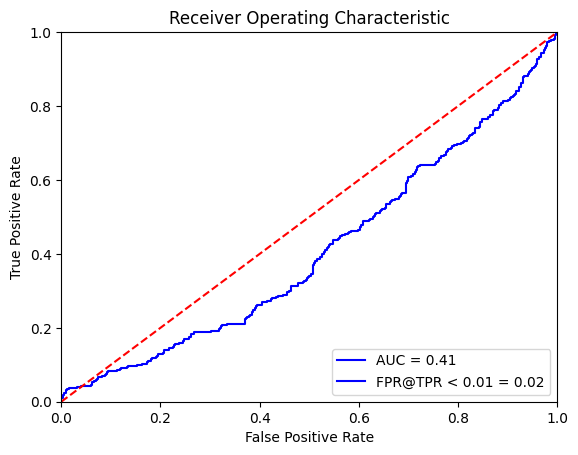

50 100
0.0025


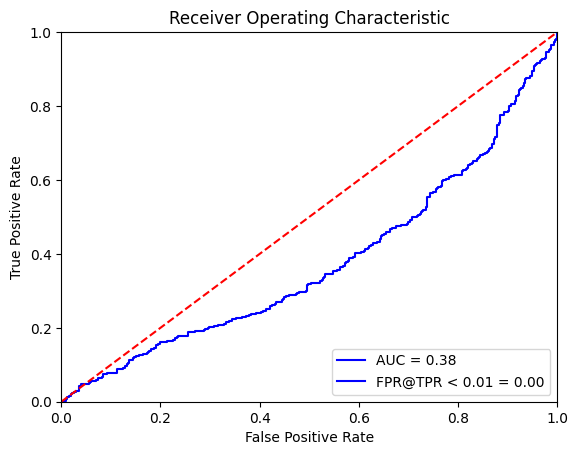

75 100
0.0025


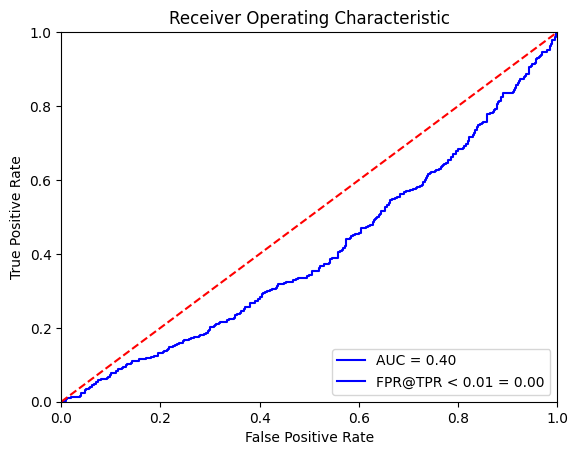

In [19]:
for i in [5,20,25,50,75,100]:
  for j in [20,25,50,75,100]:
    if i < j:
      print(i , j)
      roc_graph(i, j, df)




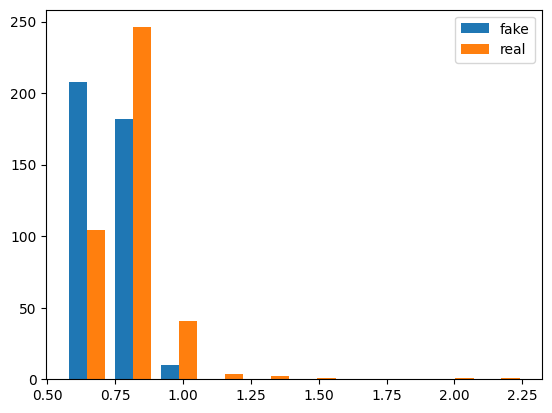

In [20]:
plt.hist([df['fake_5'] / df['fake_50'], df['real_5'] / df['real_50']])

plt.legend(['fake', 'real'])
plt.show()

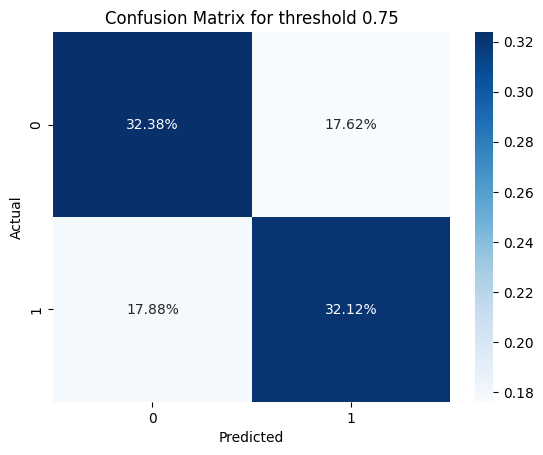

In [21]:
cf_matrix(5, 50, 0.75, df)

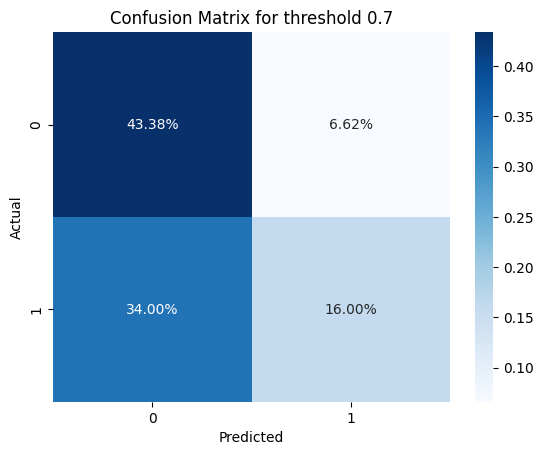

In [22]:
cf_matrix(5, 50, 0.7, df)

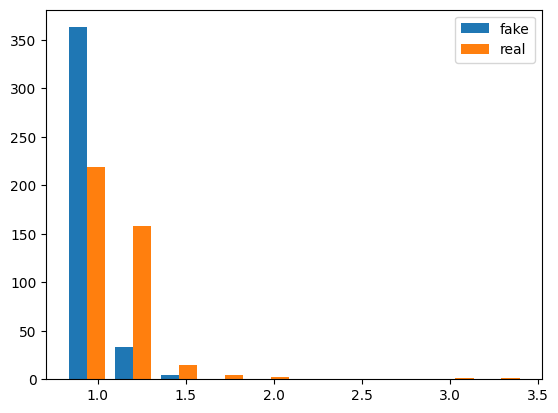

In [23]:
plt.hist([df['fake_5'] / df['fake_20'], df['real_5'] / df['real_20']])

plt.legend(['fake', 'real'])
plt.show()

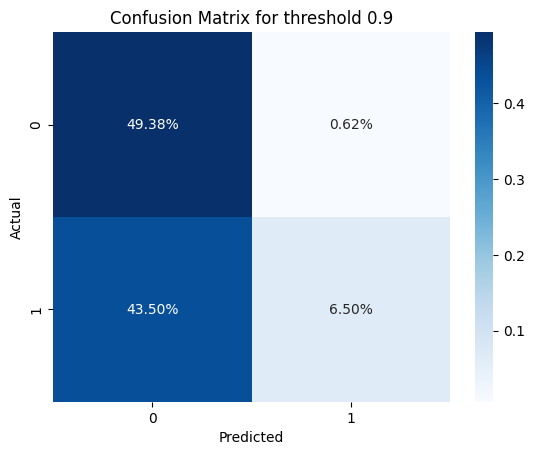

In [24]:
cf_matrix(5, 20, 0.9, df)

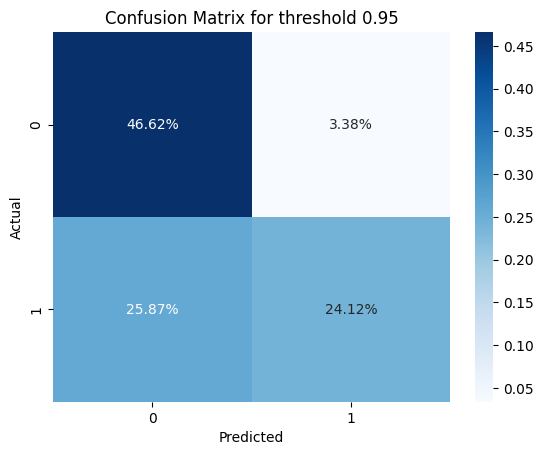

In [25]:
cf_matrix(5, 20, 0.95, df)